In [1]:
import time
import csv

import pandas as pd

import requests
from bs4 import BeautifulSoup

In [2]:
#df = pd.read_csv('urls_universidades_argentinas.csv')

df = pd.read_csv('datos/unrc/unrc_sub_domains.csv', header=None)
df

,0
0,www.unrc.edu.ar
1,webmail.unrc.edu.ar
2,sisinfo.unrc.edu.ar
3,www.siat.unrc.edu.ar
4,www.ing.unrc.edu.ar
5,gma.ing.unrc.edu.ar
6,www.irc.unrc.edu.ar
7,juanfilloy.bib.unrc.edu.ar
8,www.hum.unrc.edu.ar
9,www.eco.unrc.edu.ar


In [3]:
def absolute_url(site, href):
    print('sitio ', site, 'href: ', href)
    if '#' in href or '.exe' in href:
        print('encontré # o .exe')
        return False
    elif 'http' in href:
        print('encontré http')
        return(href)
    else:
        try:
            print(href)
            print(href.split('/')[1])
            return('http://' + site + '/' + href.split('/')[1])
        except:
            print('no pude splitear')
            return(False)

In [4]:
def has_a_form(href):
    # ignorar form de búsqueda
    if href == False:
        return(href)
    else:
        try:
            r = requests.get(href, verify=False)
            soup = BeautifulSoup(r.text)
            if soup.findAll('input'):
                print('encontré form: ', href)
                return (True)
            else:
                return(False)
        except ConnectionRefusedError or NewConnectionError or NewConnectionError:
            return(False)

In [5]:
def pages_finder(name_dict, soup):
    oferta_list = []
    contacto_list = []
    forms_list = []
    form_found = False

    anchor_list = [anchor['href'] for anchor in soup.findAll('a', href=True)]
    in_domain_anchor_list = [href for href in anchor_list if ('.'.join(site.split('.')[-3:]) in href or '../' in href)]
    print(site + ', links: ')
    #print(in_domain_anchor_list)
    # pasar a minuscula los links
    
    # Búsqueda rápida para "oferta académica" y "contacto"
    oferta_list = [s for s in in_domain_anchor_list if ("oferta" in s or "carrera" in s)]
    print(site + ', oferta académica: ')
    print(oferta_list)
    
    if oferta_list:
        name_dict['oferta'] = absolute_url(name_dict['url'], oferta_list[0])
    
    contacto_list = [s for s in in_domain_anchor_list if "contacto" in s]
    print(site + ', contacto: ')
    print(contacto_list)
    
    if contacto_list:
        href = absolute_url(name_dict['url'], contacto_list[0])
        if has_a_form(href):
            name_dict['formulario'] = href
            form_found = True
    
    if not form_found:
        forms_list =  [s for s in in_domain_anchor_list if ("inscripcion" in s or "beca" in s or "solicitud" in s)]
        if forms_list:
            for href in forms_list:
                url = absolute_url(name_dict['url'], href)
                if has_a_form(url):
                    name_dict['formulario'] = url
                    form_found = True
                    break
        
        else:
            tmp_list = [href for href in in_domain_anchor_list if href not in oferta_list]
            tmp_list_2 = [href for href in tmp_list if href not in contacto_list]
            other_links = [href for href in tmp_list_2 if href not in forms_list]
            for link in other_links:
                url = absolute_url(name_dict['url'], link)
                if has_a_form(url):
                    form_found = True
                    name_dict['formulario'] = url
                    break
            
    return(name_dict)

In [6]:
def title_finder(soup):
    try:
        title = soup.title.contents[0]
    except AttributeError:
        title = False
    except IndexError:
        title = False
    return(title)

In [7]:
def url_to_dict(name_dict, soup):
    name_dict = pages_finder(name_dict, soup)
    return(name_dict)

In [8]:
diccionarios = {}
for site in df[0]:
    url = 'http://' + site
    try:
        r = requests.get(url, verify=False)
        soup = BeautifulSoup(r.text)
        title = title_finder(soup)

        if title:
            diccionarios[site] = {'url': url, 'title': title}
        else:
            diccionarios[site] = {'url': url, 'title': 'página sin título'}
            
        diccionarios[site] = url_to_dict(diccionarios[site], soup)
    
    #except (MaxRetryError or ConnectionRefusedError or NewConnectionError):
    except:
        diccionarios[site] = {'url': url, 'title': 'página no disponible'}
        
    print(diccionarios)

/home/bibiana/.conda/envs/taw/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


www.unrc.edu.ar, links: 
www.unrc.edu.ar, oferta académica: 
['https://www.unrc.edu.ar/unrc/estudiar/carreras.php']
sitio  http://www.unrc.edu.ar href:  https://www.unrc.edu.ar/unrc/estudiar/carreras.php
encontré http
www.unrc.edu.ar, contacto: 
['https://www.unrc.edu.ar/unrc/launiversidad/contacto.php']
sitio  http://www.unrc.edu.ar href:  https://www.unrc.edu.ar/unrc/launiversidad/contacto.php
encontré http


/home/bibiana/.conda/envs/taw/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


encontré form:  https://www.unrc.edu.ar/unrc/launiversidad/contacto.php
{'www.unrc.edu.ar': {'url': 'http://www.unrc.edu.ar', 'title': 'Universidad Nacional de Río Cuarto', 'oferta': 'https://www.unrc.edu.ar/unrc/estudiar/carreras.php', 'formulario': 'https://www.unrc.edu.ar/unrc/launiversidad/contacto.php'}}


/home/bibiana/.conda/envs/taw/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/home/bibiana/.conda/envs/taw/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


webmail.unrc.edu.ar, links: 
webmail.unrc.edu.ar, oferta académica: 
[]
webmail.unrc.edu.ar, contacto: 
[]
sitio  http://webmail.unrc.edu.ar href:  https://www.unrc.edu.ar/
encontré http


/home/bibiana/.conda/envs/taw/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


sitio  http://webmail.unrc.edu.ar href:  https://www.unrc.edu.ar/unrc/uticomunicacion/
encontré http


/home/bibiana/.conda/envs/taw/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'www.unrc.edu.ar': {'url': 'http://www.unrc.edu.ar', 'title': 'Universidad Nacional de Río Cuarto', 'oferta': 'https://www.unrc.edu.ar/unrc/estudiar/carreras.php', 'formulario': 'https://www.unrc.edu.ar/unrc/launiversidad/contacto.php'}, 'webmail.unrc.edu.ar': {'url': 'http://webmail.unrc.edu.ar', 'title': 'Horde :: WEBMAIL de la UNRC'}}


/home/bibiana/.conda/envs/taw/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


sisinfo.unrc.edu.ar, links: 
sisinfo.unrc.edu.ar, oferta académica: 
['https://www.unrc.edu.ar/unrc/estudiar/carreras.php']
sitio  http://sisinfo.unrc.edu.ar href:  https://www.unrc.edu.ar/unrc/estudiar/carreras.php
encontré http
sisinfo.unrc.edu.ar, contacto: 
['https://www.unrc.edu.ar/unrc/launiversidad/contacto.php', 'https://sisinfo.unrc.edu.ar/entrada2/contacto-ext.php']
sitio  http://sisinfo.unrc.edu.ar href:  https://www.unrc.edu.ar/unrc/launiversidad/contacto.php
encontré http


/home/bibiana/.conda/envs/taw/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


encontré form:  https://www.unrc.edu.ar/unrc/launiversidad/contacto.php
{'www.unrc.edu.ar': {'url': 'http://www.unrc.edu.ar', 'title': 'Universidad Nacional de Río Cuarto', 'oferta': 'https://www.unrc.edu.ar/unrc/estudiar/carreras.php', 'formulario': 'https://www.unrc.edu.ar/unrc/launiversidad/contacto.php'}, 'webmail.unrc.edu.ar': {'url': 'http://webmail.unrc.edu.ar', 'title': 'Horde :: WEBMAIL de la UNRC'}, 'sisinfo.unrc.edu.ar': {'url': 'http://sisinfo.unrc.edu.ar', 'title': 'Universidad Nacional de Río Cuarto', 'oferta': 'https://www.unrc.edu.ar/unrc/estudiar/carreras.php', 'formulario': 'https://www.unrc.edu.ar/unrc/launiversidad/contacto.php'}}
www.siat.unrc.edu.ar, links: 
www.siat.unrc.edu.ar, oferta académica: 
[]
www.siat.unrc.edu.ar, contacto: 
[]
sitio  http://www.siat.unrc.edu.ar href:  http://www.irc.unrc.edu.ar/
encontré http
encontré form:  http://www.irc.unrc.edu.ar/
{'www.unrc.edu.ar': {'url': 'http://www.unrc.edu.ar', 'title': 'Universidad Nacional de Río Cuarto', 'o

/home/bibiana/.conda/envs/taw/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


www.ing.unrc.edu.ar, links: 
www.ing.unrc.edu.ar, oferta académica: 
[]
www.ing.unrc.edu.ar, contacto: 
[]
sitio  http://www.ing.unrc.edu.ar href:  http://correo.ing.unrc.edu.ar/
encontré http


/home/bibiana/.conda/envs/taw/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/home/bibiana/.conda/envs/taw/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


encontré form:  http://correo.ing.unrc.edu.ar/
{'www.unrc.edu.ar': {'url': 'http://www.unrc.edu.ar', 'title': 'Universidad Nacional de Río Cuarto', 'oferta': 'https://www.unrc.edu.ar/unrc/estudiar/carreras.php', 'formulario': 'https://www.unrc.edu.ar/unrc/launiversidad/contacto.php'}, 'webmail.unrc.edu.ar': {'url': 'http://webmail.unrc.edu.ar', 'title': 'Horde :: WEBMAIL de la UNRC'}, 'sisinfo.unrc.edu.ar': {'url': 'http://sisinfo.unrc.edu.ar', 'title': 'Universidad Nacional de Río Cuarto', 'oferta': 'https://www.unrc.edu.ar/unrc/estudiar/carreras.php', 'formulario': 'https://www.unrc.edu.ar/unrc/launiversidad/contacto.php'}, 'www.siat.unrc.edu.ar': {'url': 'http://www.siat.unrc.edu.ar', 'title': 'Campus Virtual SIAT - Universidad Nacional de Río Cuarto', 'formulario': 'http://www.irc.unrc.edu.ar/'}, 'www.ing.unrc.edu.ar': {'url': 'http://www.ing.unrc.edu.ar', 'title': 'Facultad de Ingeniería - UNRC', 'formulario': 'http://correo.ing.unrc.edu.ar/'}}
{'www.unrc.edu.ar': {'url': 'http://

/home/bibiana/.conda/envs/taw/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


sitio  http://juanfilloy.bib.unrc.edu.ar href:  http://juanfilloy.bib.unrc.edu.ar/adquisicion/php/pedidolibro-listado.php?fac=2
encontré http
encontré form:  http://juanfilloy.bib.unrc.edu.ar/adquisicion/php/pedidolibro-listado.php?fac=2
{'www.unrc.edu.ar': {'url': 'http://www.unrc.edu.ar', 'title': 'Universidad Nacional de Río Cuarto', 'oferta': 'https://www.unrc.edu.ar/unrc/estudiar/carreras.php', 'formulario': 'https://www.unrc.edu.ar/unrc/launiversidad/contacto.php'}, 'webmail.unrc.edu.ar': {'url': 'http://webmail.unrc.edu.ar', 'title': 'Horde :: WEBMAIL de la UNRC'}, 'sisinfo.unrc.edu.ar': {'url': 'http://sisinfo.unrc.edu.ar', 'title': 'Universidad Nacional de Río Cuarto', 'oferta': 'https://www.unrc.edu.ar/unrc/estudiar/carreras.php', 'formulario': 'https://www.unrc.edu.ar/unrc/launiversidad/contacto.php'}, 'www.siat.unrc.edu.ar': {'url': 'http://www.siat.unrc.edu.ar', 'title': 'Campus Virtual SIAT - Universidad Nacional de Río Cuarto', 'formulario': 'http://www.irc.unrc.edu.ar/'

/home/bibiana/.conda/envs/taw/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


www.eco.unrc.edu.ar, links: 
www.eco.unrc.edu.ar, oferta académica: 
[]
www.eco.unrc.edu.ar, contacto: 
[]
{'www.unrc.edu.ar': {'url': 'http://www.unrc.edu.ar', 'title': 'Universidad Nacional de Río Cuarto', 'oferta': 'https://www.unrc.edu.ar/unrc/estudiar/carreras.php', 'formulario': 'https://www.unrc.edu.ar/unrc/launiversidad/contacto.php'}, 'webmail.unrc.edu.ar': {'url': 'http://webmail.unrc.edu.ar', 'title': 'Horde :: WEBMAIL de la UNRC'}, 'sisinfo.unrc.edu.ar': {'url': 'http://sisinfo.unrc.edu.ar', 'title': 'Universidad Nacional de Río Cuarto', 'oferta': 'https://www.unrc.edu.ar/unrc/estudiar/carreras.php', 'formulario': 'https://www.unrc.edu.ar/unrc/launiversidad/contacto.php'}, 'www.siat.unrc.edu.ar': {'url': 'http://www.siat.unrc.edu.ar', 'title': 'Campus Virtual SIAT - Universidad Nacional de Río Cuarto', 'formulario': 'http://www.irc.unrc.edu.ar/'}, 'www.ing.unrc.edu.ar': {'url': 'http://www.ing.unrc.edu.ar', 'title': 'Facultad de Ingeniería - UNRC', 'formulario': 'http://cor

/home/bibiana/.conda/envs/taw/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


app2.eco.unrc.edu.ar, links: 
app2.eco.unrc.edu.ar, oferta académica: 
[]
app2.eco.unrc.edu.ar, contacto: 
[]
sitio  http://app2.eco.unrc.edu.ar href:  https://app2.eco.unrc.edu.ar
encontré http


/home/bibiana/.conda/envs/taw/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


sitio  http://app2.eco.unrc.edu.ar href:  https://app2.eco.unrc.edu.ar/home
encontré http


/home/bibiana/.conda/envs/taw/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/home/bibiana/.conda/envs/taw/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


encontré form:  https://app2.eco.unrc.edu.ar/home
{'www.unrc.edu.ar': {'url': 'http://www.unrc.edu.ar', 'title': 'Universidad Nacional de Río Cuarto', 'oferta': 'https://www.unrc.edu.ar/unrc/estudiar/carreras.php', 'formulario': 'https://www.unrc.edu.ar/unrc/launiversidad/contacto.php'}, 'webmail.unrc.edu.ar': {'url': 'http://webmail.unrc.edu.ar', 'title': 'Horde :: WEBMAIL de la UNRC'}, 'sisinfo.unrc.edu.ar': {'url': 'http://sisinfo.unrc.edu.ar', 'title': 'Universidad Nacional de Río Cuarto', 'oferta': 'https://www.unrc.edu.ar/unrc/estudiar/carreras.php', 'formulario': 'https://www.unrc.edu.ar/unrc/launiversidad/contacto.php'}, 'www.siat.unrc.edu.ar': {'url': 'http://www.siat.unrc.edu.ar', 'title': 'Campus Virtual SIAT - Universidad Nacional de Río Cuarto', 'formulario': 'http://www.irc.unrc.edu.ar/'}, 'www.ing.unrc.edu.ar': {'url': 'http://www.ing.unrc.edu.ar', 'title': 'Facultad de Ingeniería - UNRC', 'formulario': 'http://correo.ing.unrc.edu.ar/'}, 'gma.ing.unrc.edu.ar': {'url': 'h

/home/bibiana/.conda/envs/taw/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


www.fce.unrc.edu.ar, links: 
www.fce.unrc.edu.ar, oferta académica: 
[]
www.fce.unrc.edu.ar, contacto: 
['https://www.fce.unrc.edu.ar/contacto/']
sitio  http://www.fce.unrc.edu.ar href:  https://www.fce.unrc.edu.ar/contacto/
encontré http


/home/bibiana/.conda/envs/taw/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


encontré form:  https://www.fce.unrc.edu.ar/contacto/
{'www.unrc.edu.ar': {'url': 'http://www.unrc.edu.ar', 'title': 'Universidad Nacional de Río Cuarto', 'oferta': 'https://www.unrc.edu.ar/unrc/estudiar/carreras.php', 'formulario': 'https://www.unrc.edu.ar/unrc/launiversidad/contacto.php'}, 'webmail.unrc.edu.ar': {'url': 'http://webmail.unrc.edu.ar', 'title': 'Horde :: WEBMAIL de la UNRC'}, 'sisinfo.unrc.edu.ar': {'url': 'http://sisinfo.unrc.edu.ar', 'title': 'Universidad Nacional de Río Cuarto', 'oferta': 'https://www.unrc.edu.ar/unrc/estudiar/carreras.php', 'formulario': 'https://www.unrc.edu.ar/unrc/launiversidad/contacto.php'}, 'www.siat.unrc.edu.ar': {'url': 'http://www.siat.unrc.edu.ar', 'title': 'Campus Virtual SIAT - Universidad Nacional de Río Cuarto', 'formulario': 'http://www.irc.unrc.edu.ar/'}, 'www.ing.unrc.edu.ar': {'url': 'http://www.ing.unrc.edu.ar', 'title': 'Facultad de Ingeniería - UNRC', 'formulario': 'http://correo.ing.unrc.edu.ar/'}, 'gma.ing.unrc.edu.ar': {'url'

/home/bibiana/.conda/envs/taw/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


www.extension.unrc.edu.ar, links: 
www.extension.unrc.edu.ar, oferta académica: 
[]
www.extension.unrc.edu.ar, contacto: 
[]
{'www.unrc.edu.ar': {'url': 'http://www.unrc.edu.ar', 'title': 'Universidad Nacional de Río Cuarto', 'oferta': 'https://www.unrc.edu.ar/unrc/estudiar/carreras.php', 'formulario': 'https://www.unrc.edu.ar/unrc/launiversidad/contacto.php'}, 'webmail.unrc.edu.ar': {'url': 'http://webmail.unrc.edu.ar', 'title': 'Horde :: WEBMAIL de la UNRC'}, 'sisinfo.unrc.edu.ar': {'url': 'http://sisinfo.unrc.edu.ar', 'title': 'Universidad Nacional de Río Cuarto', 'oferta': 'https://www.unrc.edu.ar/unrc/estudiar/carreras.php', 'formulario': 'https://www.unrc.edu.ar/unrc/launiversidad/contacto.php'}, 'www.siat.unrc.edu.ar': {'url': 'http://www.siat.unrc.edu.ar', 'title': 'Campus Virtual SIAT - Universidad Nacional de Río Cuarto', 'formulario': 'http://www.irc.unrc.edu.ar/'}, 'www.ing.unrc.edu.ar': {'url': 'http://www.ing.unrc.edu.ar', 'title': 'Facultad de Ingeniería - UNRC', 'formul

/home/bibiana/.conda/envs/taw/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


encontré form:  https://cepeiper.unrc.edu.ar/
{'www.unrc.edu.ar': {'url': 'http://www.unrc.edu.ar', 'title': 'Universidad Nacional de Río Cuarto', 'oferta': 'https://www.unrc.edu.ar/unrc/estudiar/carreras.php', 'formulario': 'https://www.unrc.edu.ar/unrc/launiversidad/contacto.php'}, 'webmail.unrc.edu.ar': {'url': 'http://webmail.unrc.edu.ar', 'title': 'Horde :: WEBMAIL de la UNRC'}, 'sisinfo.unrc.edu.ar': {'url': 'http://sisinfo.unrc.edu.ar', 'title': 'Universidad Nacional de Río Cuarto', 'oferta': 'https://www.unrc.edu.ar/unrc/estudiar/carreras.php', 'formulario': 'https://www.unrc.edu.ar/unrc/launiversidad/contacto.php'}, 'www.siat.unrc.edu.ar': {'url': 'http://www.siat.unrc.edu.ar', 'title': 'Campus Virtual SIAT - Universidad Nacional de Río Cuarto', 'formulario': 'http://www.irc.unrc.edu.ar/'}, 'www.ing.unrc.edu.ar': {'url': 'http://www.ing.unrc.edu.ar', 'title': 'Facultad de Ingeniería - UNRC', 'formulario': 'http://correo.ing.unrc.edu.ar/'}, 'gma.ing.unrc.edu.ar': {'url': 'http:

/home/bibiana/.conda/envs/taw/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


encontré form:  https://cepeiper.unrc.edu.ar/
{'www.unrc.edu.ar': {'url': 'http://www.unrc.edu.ar', 'title': 'Universidad Nacional de Río Cuarto', 'oferta': 'https://www.unrc.edu.ar/unrc/estudiar/carreras.php', 'formulario': 'https://www.unrc.edu.ar/unrc/launiversidad/contacto.php'}, 'webmail.unrc.edu.ar': {'url': 'http://webmail.unrc.edu.ar', 'title': 'Horde :: WEBMAIL de la UNRC'}, 'sisinfo.unrc.edu.ar': {'url': 'http://sisinfo.unrc.edu.ar', 'title': 'Universidad Nacional de Río Cuarto', 'oferta': 'https://www.unrc.edu.ar/unrc/estudiar/carreras.php', 'formulario': 'https://www.unrc.edu.ar/unrc/launiversidad/contacto.php'}, 'www.siat.unrc.edu.ar': {'url': 'http://www.siat.unrc.edu.ar', 'title': 'Campus Virtual SIAT - Universidad Nacional de Río Cuarto', 'formulario': 'http://www.irc.unrc.edu.ar/'}, 'www.ing.unrc.edu.ar': {'url': 'http://www.ing.unrc.edu.ar', 'title': 'Facultad de Ingeniería - UNRC', 'formulario': 'http://correo.ing.unrc.edu.ar/'}, 'gma.ing.unrc.edu.ar': {'url': 'http:

dmi.exa.unrc.edu.ar, links: 
dmi.exa.unrc.edu.ar, oferta académica: 
[]
dmi.exa.unrc.edu.ar, contacto: 
[]
sitio  http://dmi.exa.unrc.edu.ar href:  http://www.unrc.edu.ar
encontré http


/home/bibiana/.conda/envs/taw/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


sitio  http://dmi.exa.unrc.edu.ar href:  http://www.exa.unrc.edu.ar
encontré http
encontré form:  http://www.exa.unrc.edu.ar
{'www.unrc.edu.ar': {'url': 'http://www.unrc.edu.ar', 'title': 'Universidad Nacional de Río Cuarto', 'oferta': 'https://www.unrc.edu.ar/unrc/estudiar/carreras.php', 'formulario': 'https://www.unrc.edu.ar/unrc/launiversidad/contacto.php'}, 'webmail.unrc.edu.ar': {'url': 'http://webmail.unrc.edu.ar', 'title': 'Horde :: WEBMAIL de la UNRC'}, 'sisinfo.unrc.edu.ar': {'url': 'http://sisinfo.unrc.edu.ar', 'title': 'Universidad Nacional de Río Cuarto', 'oferta': 'https://www.unrc.edu.ar/unrc/estudiar/carreras.php', 'formulario': 'https://www.unrc.edu.ar/unrc/launiversidad/contacto.php'}, 'www.siat.unrc.edu.ar': {'url': 'http://www.siat.unrc.edu.ar', 'title': 'Campus Virtual SIAT - Universidad Nacional de Río Cuarto', 'formulario': 'http://www.irc.unrc.edu.ar/'}, 'www.ing.unrc.edu.ar': {'url': 'http://www.ing.unrc.edu.ar', 'title': 'Facultad de Ingeniería - UNRC', 'formul

dc.exa.unrc.edu.ar, links: 
dc.exa.unrc.edu.ar, oferta académica: 
[]
dc.exa.unrc.edu.ar, contacto: 
[]
{'www.unrc.edu.ar': {'url': 'http://www.unrc.edu.ar', 'title': 'Universidad Nacional de Río Cuarto', 'oferta': 'https://www.unrc.edu.ar/unrc/estudiar/carreras.php', 'formulario': 'https://www.unrc.edu.ar/unrc/launiversidad/contacto.php'}, 'webmail.unrc.edu.ar': {'url': 'http://webmail.unrc.edu.ar', 'title': 'Horde :: WEBMAIL de la UNRC'}, 'sisinfo.unrc.edu.ar': {'url': 'http://sisinfo.unrc.edu.ar', 'title': 'Universidad Nacional de Río Cuarto', 'oferta': 'https://www.unrc.edu.ar/unrc/estudiar/carreras.php', 'formulario': 'https://www.unrc.edu.ar/unrc/launiversidad/contacto.php'}, 'www.siat.unrc.edu.ar': {'url': 'http://www.siat.unrc.edu.ar', 'title': 'Campus Virtual SIAT - Universidad Nacional de Río Cuarto', 'formulario': 'http://www.irc.unrc.edu.ar/'}, 'www.ing.unrc.edu.ar': {'url': 'http://www.ing.unrc.edu.ar', 'title': 'Facultad de Ingeniería - UNRC', 'formulario': 'http://correo

/home/bibiana/.conda/envs/taw/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


sitio  http://geo.exa.unrc.edu.ar href:  http://www.unrc.edu.ar/
encontré http


/home/bibiana/.conda/envs/taw/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


sitio  http://geo.exa.unrc.edu.ar href:  http://intra.exa.unrc.edu.ar/
encontré http
sitio  http://geo.exa.unrc.edu.ar href:  http://geo.exa.unrc.edu.ar
encontré http
sitio  http://geo.exa.unrc.edu.ar href:  http://geo.exa.unrc.edu.ar/grado
encontré http
sitio  http://geo.exa.unrc.edu.ar href:  http://geo.exa.unrc.edu.ar/Posgrado
encontré http
sitio  http://geo.exa.unrc.edu.ar href:  http://geo.exa.unrc.edu.ar/Materias
encontré http
sitio  http://geo.exa.unrc.edu.ar href:  http://geo.exa.unrc.edu.ar/docentes
encontré http
sitio  http://geo.exa.unrc.edu.ar href:  http://geo.exa.unrc.edu.ar/Equipo
encontré http
sitio  http://geo.exa.unrc.edu.ar href:  http://geo.exa.unrc.edu.ar/extension
encontré http
sitio  http://geo.exa.unrc.edu.ar href:  http://geo.exa.unrc.edu.ar/investigacion
encontré http
sitio  http://geo.exa.unrc.edu.ar href:  http://geo.exa.unrc.edu.ar/Novedades
encontré http
sitio  http://geo.exa.unrc.edu.ar href:  http://geo.exa.unrc.edu.ar/PLANTEL
encontré http
sitio  http:/

dbm.exa.unrc.edu.ar, links: 
dbm.exa.unrc.edu.ar, oferta académica: 
[]
dbm.exa.unrc.edu.ar, contacto: 
[]
sitio  http://dbm.exa.unrc.edu.ar href:  http://www.unrc.edu.ar/
encontré http


/home/bibiana/.conda/envs/taw/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


sitio  http://dbm.exa.unrc.edu.ar href:  http://intra.exa.unrc.edu.ar/
encontré http
sitio  http://dbm.exa.unrc.edu.ar href:  http://dbm.exa.unrc.edu.ar
encontré http
sitio  http://dbm.exa.unrc.edu.ar href:  http://dbm.exa.unrc.edu.ar/Autoridades
encontré http
sitio  http://dbm.exa.unrc.edu.ar href:  http://dbm.exa.unrc.edu.ar/docente1
encontré http
sitio  http://dbm.exa.unrc.edu.ar href:  http://dbm.exa.unrc.edu.ar/materias
encontré http
sitio  http://dbm.exa.unrc.edu.ar href:  http://dbm.exa.unrc.edu.ar/Tecnico
encontré http
sitio  http://dbm.exa.unrc.edu.ar href:  http://dbm.exa.unrc.edu.ar/Materias
encontré http
sitio  http://dbm.exa.unrc.edu.ar href:  http://dbm.exa.unrc.edu.ar/Docencia
encontré http
sitio  http://dbm.exa.unrc.edu.ar href:  mailto:mgarrido@exa.unrc.edu.ar
mailto:mgarrido@exa.unrc.edu.ar
no pude splitear
{'www.unrc.edu.ar': {'url': 'http://www.unrc.edu.ar', 'title': 'Universidad Nacional de Río Cuarto', 'oferta': 'https://www.unrc.edu.ar/unrc/estudiar/carreras.php'

/home/bibiana/.conda/envs/taw/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


sitio  http://dcn.exa.unrc.edu.ar href:  http://www.exa.unrc.edu.ar
encontré http
encontré form:  http://www.exa.unrc.edu.ar
{'www.unrc.edu.ar': {'url': 'http://www.unrc.edu.ar', 'title': 'Universidad Nacional de Río Cuarto', 'oferta': 'https://www.unrc.edu.ar/unrc/estudiar/carreras.php', 'formulario': 'https://www.unrc.edu.ar/unrc/launiversidad/contacto.php'}, 'webmail.unrc.edu.ar': {'url': 'http://webmail.unrc.edu.ar', 'title': 'Horde :: WEBMAIL de la UNRC'}, 'sisinfo.unrc.edu.ar': {'url': 'http://sisinfo.unrc.edu.ar', 'title': 'Universidad Nacional de Río Cuarto', 'oferta': 'https://www.unrc.edu.ar/unrc/estudiar/carreras.php', 'formulario': 'https://www.unrc.edu.ar/unrc/launiversidad/contacto.php'}, 'www.siat.unrc.edu.ar': {'url': 'http://www.siat.unrc.edu.ar', 'title': 'Campus Virtual SIAT - Universidad Nacional de Río Cuarto', 'formulario': 'http://www.irc.unrc.edu.ar/'}, 'www.ing.unrc.edu.ar': {'url': 'http://www.ing.unrc.edu.ar', 'title': 'Facultad de Ingeniería - UNRC', 'formul

/home/bibiana/.conda/envs/taw/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [18]:
for key in diccionarios.keys():
    tmp_dict = {'url': diccionarios[key]['url']}
    
    if 'oferta' in diccionarios[key].keys():
        tmp_dict['oferta'] = diccionarios[key]['oferta']
        
    if 'formulario' in diccionarios[key].keys():
        tmp_dict['formulario'] = diccionarios[key]['formulario']
        
        tmp_df = pd.DataFrame.from_dict(tmp_dict, orient='index', columns=None)
        nombre_archivo = 'archivos/' + key + '.csv'
        print(tmp_df[0])
        
        tmp_df[0].to_csv(nombre_archivo, index=False)
        nombre_salida = 'archivos/' + key + '_resultado'
        !python taw_scraper.py -f /home/bibiana/usr/firefox/firefox -r $nombre_archivo $nombre_salida
        
        try:
            df_res = pd.read_json(path_or_buf=nombre_salida, lines=True)
            diccionarios[key]['taw_analysis'] = df_res
            print(key, ' taw exitoso')
        except (EmptyDataError or FileNotFoundError):
            diccionarios[key]['taw_analysis'] = False
            print(key, ' taw efallido')

url                                      http://www.unrc.edu.ar
oferta        https://www.unrc.edu.ar/unrc/estudiar/carreras...
formulario    https://www.unrc.edu.ar/unrc/launiversidad/con...
Name: 0, dtype: object
3 urls already downloaded

Already download, skip http://www.unrc.edu.ar


Already download, skip https://www.unrc.edu.ar/unrc/estudiar/carreras.php


Already download, skip https://www.unrc.edu.ar/unrc/launiversidad/contacto.php

www.unrc.edu.ar  taw exitoso
url                                  http://sisinfo.unrc.edu.ar
oferta        https://www.unrc.edu.ar/unrc/estudiar/carreras...
formulario    https://www.unrc.edu.ar/unrc/launiversidad/con...
Name: 0, dtype: object
3 urls already downloaded

Already download, skip http://sisinfo.unrc.edu.ar


Already download, skip https://www.unrc.edu.ar/unrc/estudiar/carreras.php


Already download, skip https://www.unrc.edu.ar/unrc/launiversidad/contacto.php

sisinfo.unrc.edu.ar  taw exitoso
url           http://www.siat.unrc.edu.ar


dcn.exa.unrc.edu.ar  taw exitoso


In [19]:
def lvl_A_finder(df):
    df_lvl_A = pd.DataFrame()
    for column in df.columns:
        if 'result' in column:
            column_lvl = column[:-6] + 'level'
            df_lvl_A[column] = df[(df[column_lvl] == 'A')][column]
    return(df_lvl_A)

In [20]:
def final_taw_result(result_list):
    if any(result == 'Fail' for result in result_list):
        final_result = 'Fail'
    elif any(result == 'Pass' for result in result_list):
        final_result = 'Pass'
    elif all(result == 'na' for result in result_list):
        final_result = 'na'
    else:
        final_result = ' '
    return(final_result)

In [21]:
def taw_result(df_lvl_A):
    final_dict = {}
    for column in df_lvl_A.columns:
        result_list = df_lvl_A[column].tolist()
        final_dict[column] = final_taw_result(result_list)
    return final_dict

In [78]:
for key in diccionarios.keys():
    print(key)
    try:
        df_tmp = diccionarios[key]['taw_analysis']
        diccionarios[key]['taw_result_A'] = lvl_A_finder(df_tmp)
        diccionarios[key]['final_result'] = taw_result(diccionarios[key]['taw_result_A'])
        diccionarios[key]['final_result']['resource'] = key
    except KeyError:
        pass
    except AttributeError:
        pass

www.unrc.edu.ar
webmail.unrc.edu.ar
sisinfo.unrc.edu.ar
www.siat.unrc.edu.ar
www.ing.unrc.edu.ar
gma.ing.unrc.edu.ar
www.irc.unrc.edu.ar
juanfilloy.bib.unrc.edu.ar
www.hum.unrc.edu.ar
www.eco.unrc.edu.ar
app2.eco.unrc.edu.ar
www.fce.unrc.edu.ar
revista.eco.unrc.edu.ar
www.extension.unrc.edu.ar
cepeiper.unrc.edu.ar
www.edutec.unrc.edu.ar
www.ayv.unrc.edu.ar
www.exa.unrc.edu.ar
dmi.exa.unrc.edu.ar
dq.exa.unrc.edu.ar
dmat.exa.unrc.edu.ar
dc.exa.unrc.edu.ar
geo.exa.unrc.edu.ar
neutron.exa.unrc.edu.ar
dbm.exa.unrc.edu.ar
dcn.exa.unrc.edu.ar
www.coro.unrc.edu.ar
cursos.ing.unrc.edu.ar


In [79]:
dict_list = []
for key in diccionarios.keys():
    if 'final_result' in diccionarios[key].keys():
        dict_list.append(diccionarios[key]['final_result'])

final_df = pd.DataFrame(dict_list)

In [80]:
# Realizo conteo para resultados "pass", "fail" y "na"
final_df['pass_lvl_A_count'] = final_df[final_df == 'Pass'].count(axis=1)
final_df['fail_lvl_A_count'] = final_df[final_df == 'Fail'].count(axis=1)
final_df['na_lvl_A_count'] = final_df[final_df == 'na'].count(axis=1)

In [81]:
final_df['score_lvl_A'] = (final_df['pass_lvl_A_count'] + final_df['na_lvl_A_count'])*4

In [82]:
final_df[['resource', 
          'pass_lvl_A_count', 
          'fail_lvl_A_count', 
          'na_lvl_A_count', 
          'score_lvl_A']].sort_values(by='score_lvl_A', ascending=False)

,resource,pass_lvl_A_count,fail_lvl_A_count,na_lvl_A_count,score_lvl_A
7,app2.eco.unrc.edu.ar,3,4,5,32
9,cepeiper.unrc.edu.ar,3,6,4,28
10,www.edutec.unrc.edu.ar,3,6,4,28
8,www.fce.unrc.edu.ar,2,4,4,24
15,neutron.exa.unrc.edu.ar,2,6,4,24
13,dq.exa.unrc.edu.ar,2,6,4,24
12,dmi.exa.unrc.edu.ar,1,7,4,20
11,www.exa.unrc.edu.ar,1,7,4,20
0,www.unrc.edu.ar,1,5,4,20
6,www.hum.unrc.edu.ar,1,6,4,20


In [83]:
df_plot_score = pd.DataFrame()

df_plot_score[['resource', 
          'score_lvl_A']] = final_df[['resource', 
                                      'score_lvl_A']]

In [84]:
df_plot_score.loc[len(df_plot_score.index)] = ['Mínimo exigido por Ley en Argentina', 80]

Text(0.5, 0, 'Puntaje')

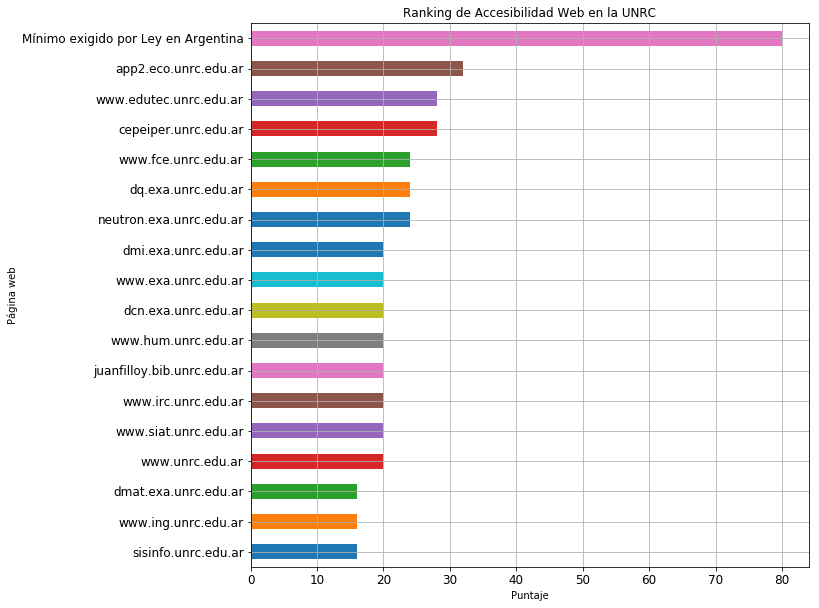

In [105]:
ax = df_plot_score[['resource', 
          'score_lvl_A']].sort_values(by='score_lvl_A', 
                                      ascending=True).plot.barh(x='resource',
                                                                y='score_lvl_A',
                                                                legend=False,
                                                               figsize=(10,10),
                                                               fontsize=12,
                                                                grid=True,
                                                               title='Ranking de Accesibilidad Web en la UNRC')
ax.set_ylabel("Página web")
ax.set_xlabel("Puntaje")

In [110]:
fig = ax.get_figure()
fig.savefig('/home/bibiana/repos-propios/unileaks.github.io/images/2018-12-10/ranking_accesibilidad_web.svg',
           bbox_inches = 'tight')

In [102]:
df_plot_result = pd.DataFrame()

df_plot_result[['resource', 
                'si, cumple',
                'no cumple',
                'no aplica']] = final_df[['resource', 
                                                'pass_lvl_A_count',
                                                'fail_lvl_A_count',
                                                'na_lvl_A_count']]
df_plot_result['no cumple'] = - df_plot_result['no cumple']

Text(0.5, 0, 'Puntaje')

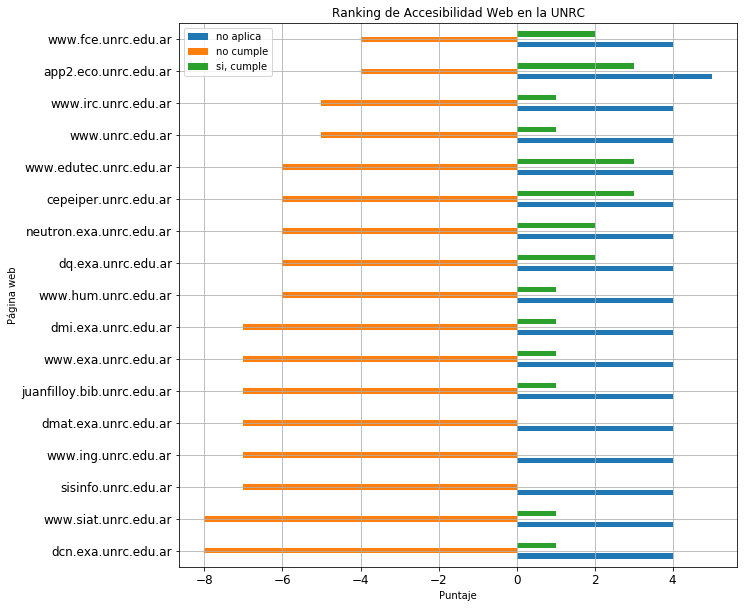

In [112]:
ax = df_plot_result.sort_values(by='no cumple', 
                                      ascending=True).plot.barh(x='resource',
                                                                y=['no aplica',
                                                                    'no cumple',
                                                                  'si, cumple'],
                                                               figsize=(10,10),
                                                               fontsize=12,
                                                                grid=True,
                                                               title='Ranking de Accesibilidad Web en la UNRC')
ax.set_ylabel("Página web")
ax.set_xlabel("Puntaje")

In [113]:
fig = ax.get_figure()
fig.savefig('/home/bibiana/repos-propios/unileaks.github.io/images/2018-12-10/cantidad_resultados.svg',
           bbox_inches = 'tight')

In [67]:
df_general_data = pd.DataFrame.from_dict(diccionarios, orient='index')

In [71]:
df_general_data['title'].sort_values()

juanfilloy.bib.unrc.edu.ar                     Biblioteca Central - Juan Filloy
www.siat.unrc.edu.ar          Campus Virtual SIAT - Universidad Nacional de ...
www.coro.unrc.edu.ar                                                Coro - UNRC
dbm.exa.unrc.edu.ar                          Departamento de Biología Molecular
dcn.exa.unrc.edu.ar                          Departamento de Ciencias Naturales
geo.exa.unrc.edu.ar                                    Departamento de Geología
dmat.exa.unrc.edu.ar                Departamento de Matemática | FCEFQyN - UNRC
dmi.exa.unrc.edu.ar                 Departamento de Microbiología e Inmunología
dq.exa.unrc.edu.ar                     Departamento de Química | FCEFQyN - UNRC
app2.eco.unrc.edu.ar                                           Encuesta Docente
www.eco.unrc.edu.ar                                                         FCE
www.fce.unrc.edu.ar           Facultad de Ciencias Economicas – Servicios In...
www.hum.unrc.edu.ar           Facultad d